### import libraries

In [1]:
#import required libraries
import numpy as np  # import numpy to calculate the array and matrix, datatype is ndarray
#import pandas as pd  #我們會以 Pandas 的 CSV 讀取功能直接存取 Google Drive 裡面的.csv
#import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader   #for batch seperation
#from torchvision.datasets import DatasetFolder
from PIL import Image
from pathlib import Path

ModuleNotFoundError: No module named 'torchtext'

### Global variable

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)
SEED = 41

cuda


### import data from local

In [ ]:
#import data from local
TRAIN_DIR = Path('train_out')
TEST_DIR = Path('data/machine-learning-2023nycu-classification/test-final/test-final')
train_val_files = sorted(list(TRAIN_DIR.rglob('*.jpg')))    #將所有子file下的.jpg以列表形式存儲在train_val_files變數中
test_files = sorted(list(TEST_DIR.rglob('*.jpg')))          #將所有子file下的.jpg以列表形式存儲在test_files變數中
len(train_val_files), len(test_files)


(193855, 10791)

In [ ]:
# We can access the class labels for the training data
print(train_val_files[0].parent.name)

abraham_grampa_simpson


### data argumentation

In [ ]:
# import os
# import torchvision.transforms.v2 as T
# from PIL import Image

# # Custom transform to add Gaussian noise
# class AddGaussianNoise(object):
#     def __init__(self, mean=0., std=1.):
#         self.std = std
#         self.mean = mean

#     def __call__(self, tensor):
#         return tensor + torch.randn(tensor.size()) * self.std + self.mean

# # Custom transform to add Speckle noise
# class AddSpeckleNoise(object):
#     """
#     Add speckle noise to the image.
#     """
#     def __init__(self, noise_level=0.1):
#         """
#         :param noise_level: Standard deviation of the noise distribution
#         """
#         self.noise_level = noise_level

#     def __call__(self, tensor):
#         """
#         :param tensor: PyTorch tensor, the image on which noise is added
#         :return: PyTorch tensor, image with speckle noise
#         """
#         # Generate speckle noise
#         noise = torch.randn_like(tensor) * self.noise_level

#         # Add speckle noise to the image
#         noisy_tensor = tensor * (1 + noise)

#         # Clip the values to be between 0 and 1
#         noisy_tensor = torch.clamp(noisy_tensor, 0, 1)

#         return noisy_tensor

# class AddPoissonNoise(object):
#     """
#     Add Poisson noise to the image.
#     """
#     def __init__(self, lam=1.0):
#         """
#         :param lam: Lambda parameter for Poisson distribution
#         """
#         self.lam = lam

#     def __call__(self, tensor):
#         """
#         :param tensor: PyTorch tensor, the image to which noise is added
#         :return: PyTorch tensor, image with Poisson noise
#         """
#         # Generate Poisson noise
#         noise = torch.poisson(self.lam * torch.ones(tensor.shape))

#         # Add Poisson noise to the image
#         noisy_tensor = tensor + noise / 255.0  # Assuming the image is scaled between 0 and 1

#         # Clip the values to be between 0 and 1
#         noisy_tensor = torch.clamp(noisy_tensor, 0, 1)

#         return noisy_tensor

# # Custom transform to add Salt and Pepper noise
# class AddSaltPepperNoise(object):
#     def __init__(self, salt_prob=0.05, pepper_prob=0.05):
#         self.salt_prob = salt_prob
#         self.pepper_prob = pepper_prob

#     def __call__(self, tensor):
#         noise = torch.rand(tensor.size())
#         tensor[(noise < self.salt_prob)] = 1  # Salt noise: setting some pixels to 1
#         tensor[(noise > 1 - self.pepper_prob)] = 0  # Pepper noise: setting some pixels to 0
#         return tensor

# # Define the image augmentation transformations
# transform = T.Compose([
#     T.ToTensor(),  # Convert PIL image to tensor

#     T.RandomApply([T.RandomHorizontalFlip()], p=0.1),
#     T.RandomApply([T.RandomVerticalFlip()], p=0.1),
#     T.RandomApply([T.RandomRotation(10)], p=0.1),

#     T.RandomApply([T.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.1)], p=0.1),
#     T.RandomGrayscale(p=0.1),
#     T.RandomInvert(p=0.1),
#     T.RandomPosterize(bits=2, p=0.1),
#     T.RandomApply([T.RandomSolarize(threshold=1.0)], p=0.05),
#     T.RandomApply([T.RandomAdjustSharpness(sharpness_factor=2)], p=0.1),

#     T.RandomApply([AddGaussianNoise(0., 0.05)], p=0.1),  # mean and std
#     T.RandomApply([AddPoissonNoise(lam=0.1)], p=0.1),  # mean and std
#     T.RandomApply([AddSpeckleNoise(noise_level=0.1)], p=0.1),
#     T.RandomApply([AddSaltPepperNoise(salt_prob=0.05, pepper_prob=0.05)], p=0.1),

#     T.RandomApply([T.RandomPerspective(distortion_scale=0.6, p=1.0)], p=0.1),
#     T.RandomApply([T.RandomAffine(degrees=(30, 70), translate=(0.1, 0.3), scale=(0.5, 0.75))], p=0.1),
#     T.RandomApply([T.ElasticTransform(alpha=250.0)], p=0.1),

#     T.RandomApply([T.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5.))], p=0.1),

#     T.RandomApply([AddGaussianNoise(0., 0.001)], p=1.0),  # mean and std
#     T.ToPILImage()  # Convert tensor back to PIL image for saving

# ])

# # Source folder containing the original images
# src_folder = "data/machine-learning-2023nycu-classification/train/train/waylon_smithers/"

# # Destination folder to save the augmented images
# dst_folder = "train_out/waylon_smithers/"

# # Create the destination folder if it doesn't exist
# if not os.path.exists(dst_folder):
#     os.makedirs(dst_folder)

# # Loop through each file in the source folder
# i=0
# for filename in os.listdir(src_folder):
#     if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
#         # Load the image
#         print("Reading ... ", filename)
#         img_path = os.path.join(src_folder, filename)
#         img = Image.open(img_path).convert("RGB")

#         # Apply the transformations
#         img_augmented = transform(img)

#         # Save the augmented image
#         print("Saving ... ", filename)
#         save_path = os.path.join(dst_folder, filename)
#         img_augmented.save(save_path, "JPEG")
#         i=i+1
#         print(i)

# print("Image augmentation completed.")

### Splitting data

In [ ]:
from sklearn.model_selection import train_test_split

train_val_labels = [path.parent.name for path in train_val_files]
train_files, val_files = train_test_split(train_val_files, test_size=0.20, stratify=train_val_labels, random_state=SEED)
train_labels_raw, val_labels_raw = [path.parent.name for path in train_files], [path.parent.name for path in val_files]

In [ ]:
# for i in range(len(train_labels_raw)):
#     print(train_labels_raw[i])

### immediately encode the class labels

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()          #create LabelEncoder實例，用於對標籤進行編碼。
label_encoder.fit(train_labels_raw)

train_labels = label_encoder.transform(train_labels_raw)    #轉換成數值編碼
val_labels = label_encoder.transform(val_labels_raw)
test_labels = None

assert len(train_labels) == len(train_files)
print(len(train_files))

class2label = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
label2class = {v:k for k,v in class2label.items()}      #為class2label的反向映射

155084


In [ ]:
# # for test
# # Sample labels for encoding
# labels = ['cat', 'dog', 'bird', 'cat', 'dog']

# # Initialize the label encoder
# label_encoder = LabelEncoder()

# # Fit the label encoder and transform the labels
# encoded_labels = label_encoder.fit_transform(labels)

# # Get the unique classes that were encoded
# unique_classes = label_encoder.classes_

# print("Encoded labels:", encoded_labels)
# print("Unique classes:", unique_classes)

In [ ]:
data_transforms = {
    'train': transforms.Compose([           #可以將多個轉換以列表形式傳遞給 transforms.Compose
        transforms.ToPILImage(),            #轉為Python Imaging Library
        # Resize the image into a fixed shape (height = width = 128)
        #transforms.Resize((128, 128)),
        # ToTensor() should be the last one of the transforms.
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.ToPILImage(),
        #transforms.Resize((128, 128)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.ToPILImage(),
        #transforms.Resize((128, 128)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
    ]),
}

### hyperparameters

In [ ]:
batch_size = 40     # smaller batch size has better performance
epochs = 12

### Dataset 
##### It would be convenient to use the datasets.ImageFolder class, but we have data for training and validation in the same folder and it is not separated in advance, so we have to make it ourselves

In [ ]:
from torch.utils.data import Dataset
from torchvision.io import read_image

class SimpsonsDataset(Dataset):
    def __init__(self, file_names, img_labels, mode, transform=None, target_transform=None):
        self.file_names = file_names
        self.img_labels = img_labels
        self.transform = transform
        self.target_transform = target_transform
        self.mode = mode
    
    def __len__(self):
        return len(self.file_names)
    
    def __getitem__(self, idx):
        img_path = str(self.file_names[idx])
        image = read_image(img_path)
        
        if self.transform:
            image = self.transform(image)
            
        if self.mode == 'test':
            return image            # only return image
        else: 
            label = self.img_labels[idx]
        
            if self.target_transform:
                label = self.target_transform(label)
            
            return image, label

In [ ]:
train_dataset = SimpsonsDataset(train_files, train_labels, "train", data_transforms["train"])
val_dataset = SimpsonsDataset(val_files, val_labels, "val", data_transforms["val"])
test_dataset = SimpsonsDataset(test_files, test_labels, "test", data_transforms["test"])
image_datasets = {"train":train_dataset, "val":val_dataset}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
print(dataset_sizes)

{'train': 155084, 'val': 38771}


### Dataloaders

In [ ]:
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True) # shuffle the data during each epoch for better training performance
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
dataloaders = {}
dataloaders["train"] = train_dataloader
dataloaders["val"] = val_dataloader

##### Let's look at some examples from the training dataloader

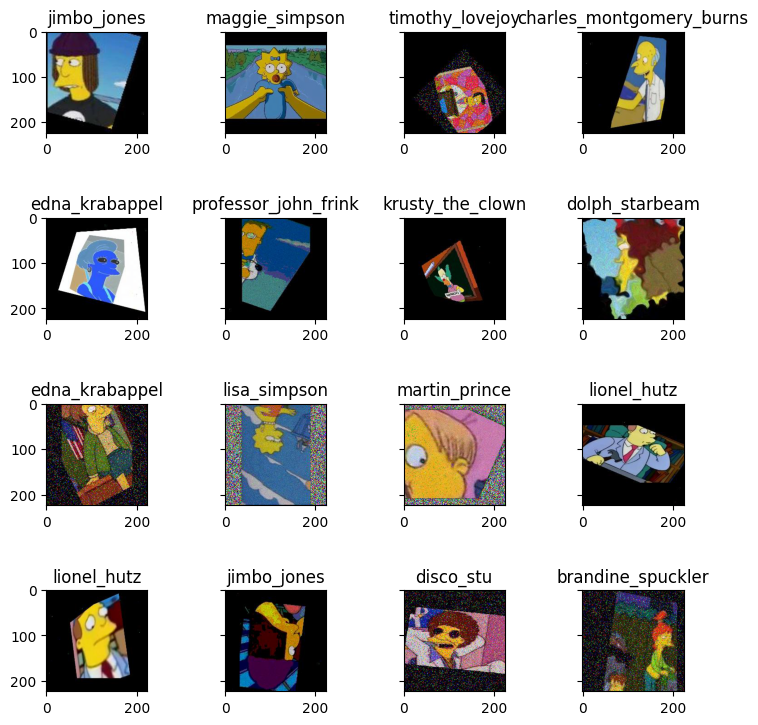

In [ ]:
# display a grid of images from a batch of training data.

def imshow(inp, title=None, plt_ax=plt):        #plt is from matplotlib
    #Imshow for Tensor
    # convert the tensor to numpy array and transpose the dimention to match matplotlib.imshow
    inp = inp.numpy().transpose((1, 2, 0))      #(height, width, channels)

    # applying the reverse transformation to bring it back to the original scale 
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean

    #Clips the image values to ensure they fall within the valid range of [0, 1]
    inp = np.clip(inp, 0, 1)
    plt_ax.imshow(inp)
    if title is not None:
        plt_ax.set_title(title)
    
# Get a batch of training data
inputs, classes = next(iter(train_dataloader))      # Retrieves a batch of training data
titles = [label2class[x] for x in classes.detach().numpy()]

fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(8, 8), sharey=True)

fig.tight_layout(pad=4.0)

i = 0
for ax in axs.flatten():
    imshow(inputs[i].cpu(), title=titles[i], plt_ax=ax)
    i += 1

In [ ]:
class Classifier(nn.Module):
    def __init__(self):
        super(Classifier, self).__init__()
        # The arguments for commonly used modules:
        # torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding)
        # torch.nn.MaxPool2d(kernel_size, stride, padding)

        # input image size: [3, 128, 128]
        self.cnn_layers = nn.Sequential(
            nn.Conv2d(3, 32, 3, 1, 1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            #nn.Dropout(),
            nn.MaxPool2d(2, 2, 0),

            nn.Conv2d(32, 64, 3, 1, 1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2, 2, 0),

            nn.Conv2d(64, 128, 3, 1, 1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            #nn.Dropout(),
            nn.MaxPool2d(2, 2, 0),

            nn.Conv2d(128, 256, 3, 1, 1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(2, 2, 0),

            nn.Conv2d(256, 256, 3, 1, 1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(2, 2, 0),

            # nn.Conv2d(256, 256, 3, 1, 1),
            # nn.BatchNorm2d(256),
            # nn.ReLU(),
            # nn.Dropout(),

            # nn.Conv2d(256, 256, 3, 1, 1),
            # nn.BatchNorm2d(256),
            # nn.ReLU(),
            # nn.Dropout(),
            # nn.MaxPool2d(2, 2, 0),

            # nn.Conv2d(256, 128, 3, 1, 1),
            # nn.BatchNorm2d(128),
            # nn.ReLU(),
            # nn.MaxPool2d(2, 2, 0),

            nn.Conv2d(256, 128, 3, 1, 1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Dropout(),
            nn.MaxPool2d(2, 2, 0),

        )
        self.fc_layers = nn.Sequential(
            nn.Linear(128 * 8 * 8, 256),      
            nn.ReLU(),
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Linear(256, 50)
        )

    def forward(self, x):
        # input (x): [batch_size, 3, 128, 128]
        # output: [batch_size, 11]

        # Extract features by convolutional layers.
        x = self.cnn_layers(x)

        #print('Shape after CNN layers:', x.shape)

        # The extracted feature map must be flatten before going to fully-connected layers.
        x = x.flatten(1)

        #print('Shape after flattening:', x.shape)

        # The features are transformed by fully-connected layers to obtain the final logits.
        x = self.fc_layers(x)
        return x

In [ ]:
# class VGG16_model(nn.Module):
#     def __init__(self, numClasses=50):
#         super(VGG16_model, self).__init__()
#         self.vgg16 = nn.Sequential(
#             nn.Conv2d(3, 64, 2),
#             nn.ReLU(inplace=True),
#             nn.Conv2d(64, 64, 2),
#             nn.ReLU(inplace=True),
#             nn.MaxPool2d(kernel_size=2, stride=1),
#             nn.Conv2d(64, 128, 2),
#             nn.ReLU(inplace=True),
#             nn.Conv2d(128, 128, 2),
#             nn.MaxPool2d(kernel_size=2, stride=1),
#             nn.ReLU(inplace=True),
#             nn.Conv2d(128, 256, 2),
#             nn.ReLU(inplace=True),
#             nn.Conv2d(256, 256, 2),
#             nn.ReLU(inplace=True),
#             nn.Conv2d(256, 256, 2),
#             nn.MaxPool2d(kernel_size=2, stride=1),
#             nn.ReLU(inplace=True),
#             nn.Conv2d(256, 512, 2),
#             nn.ReLU(inplace=True),
#             nn.Conv2d(512, 512, 2),
#             nn.ReLU(inplace=True),
#             nn.Conv2d(512, 512, 2),
#             nn.MaxPool2d(kernel_size=2, stride=1),
#             nn.ReLU(inplace=True),
#             nn.Conv2d(512, 512, 2),
#             nn.ReLU(inplace=True),
#             nn.Conv2d(512, 512, 2),
#             nn.ReLU(inplace=True),
#             nn.Conv2d(512, 512, 2),
#             nn.ReLU(inplace=True),
#             nn.MaxPool2d(kernel_size=2, stride=1)
#         )
#         self.avgpool = nn.AdaptiveAvgPool2d((7, 7))
#         self.classifier = nn.Sequential(
#             nn.Linear(512 * 7 * 7, 4096),
#             nn.ReLU(inplace=True),
#             nn.Dropout(),
#             nn.Linear(4096, 4096),
#             nn.ReLU(inplace=True),
#             nn.Dropout(),
#             nn.Linear(4096, numClasses)
#         )

#     def forward(self, x):
#         x = self.vgg16(x)
#         x = self.avgpool(x)
#         x = x.view(x.size(0), -1)
#         x = self.classifier(x)
#         return x

### Training the model

In [ ]:
import time 
import copy
from tqdm import tqdm


# criterion: loss function
# scheduler: the learning rate scheduler
def train_model(model, criterion, optimizer, scheduler, num_epochs=10):
    # initialization
    since = time.time()            # record the time when training start
    # .state_dict() 儲存了網路結構的名字和對應參數
    best_model_wts = copy.deepcopy(model.state_dict())  # To store the best model weights as a deep copy of the current model's state.
    best_acc = 0.0


    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)    

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            print(phase)
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            # initialize the parameter
            running_loss = 0.0
            running_corrects = 0

            # Iterate over data, moving data to device:
            for inputs, labels in tqdm(dataloaders[phase]):        #use a progress bar by tqdm to visualize
                inputs = inputs.to(device)
                labels = labels.to(device, dtype=torch.long)    # Ensure correct data type


                # zero the parameter gradients
                optimizer.zero_grad()       #clears the gradients of all optimized tensors

                # forward!!!!
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)             # perform a forward pass to obtain model prediction
                    _, preds = torch.max(outputs, 1)           #computes the maximum prediction for each input(along the dimension 1)
                    loss = criterion(outputs, labels)       #to compute the loss

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics for loss and accuracy
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)  # number of correct predictions for the current batch

            if phase == 'train':                # this block adjusts the learning rate based on the training loss
                scheduler.step(running_loss)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects / dataset_sizes[phase]

            #print(phase + ' Loss: ' + epoch_loss +  ' Acc: ' + epoch_acc)
            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:4f}')

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

##### We'll be using pretrained convnext_base model, for which we will finetune only the layer for classification

In [ ]:
from functools import partial
from torch.nn import functional as F


# specifying that the model should be initialized with pretrained weights
#model_conv = torchvision.models.vgg16_bn(pretrained=True)   
#model_conv = torchvision.models.resnet50(pretrained=True)

# Initialize a model, and put it on the device specified.
model_conv = Classifier().to(device)

#  We freeze these layers to retain the pre-trained knowledge
for param in model_conv.parameters():
    param.requires_grad = True

num_classes = len(class2label)

#Linear (input, output)
#model_conv.classifier = nn.Linear( 512* 7 * 7, num_classes)
model_conv.fc_layers = nn.Linear(1152, num_classes)

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

#model_conv = nn.functional.softmax(torch.cat(logits), dim=-1).numpy()
# based on adaptive moment estimation
optimizer_ft = torch.optim.AdamW(model_conv.parameters(), lr=1e-3, amsgrad=True)

# (optimizer, validation loss, stop improving for a certain # of epoch)
exp_lr_scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer_ft, 'min', patience=3)

In [ ]:
model_ft = train_model(model_conv, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=epochs)

Epoch 0/11
----------
train


100%|██████████| 3878/3878 [19:51<00:00,  3.25it/s]  


train Loss: 2.3056 Acc: 0.4118
val


100%|██████████| 970/970 [04:57<00:00,  3.26it/s]  


val Loss: 1.6942 Acc: 0.5887
Epoch 1/11
----------
train


100%|██████████| 3878/3878 [28:02<00:00,  2.30it/s]


train Loss: 1.3560 Acc: 0.6439
val


100%|██████████| 970/970 [06:47<00:00,  2.38it/s]


val Loss: 1.1796 Acc: 0.7078
Epoch 2/11
----------
train


100%|██████████| 3878/3878 [18:41<00:00,  3.46it/s]


train Loss: 1.0313 Acc: 0.7249
val


100%|██████████| 970/970 [03:30<00:00,  4.62it/s]


val Loss: 0.9578 Acc: 0.7553
Epoch 3/11
----------
train


100%|██████████| 3878/3878 [18:24<00:00,  3.51it/s]


train Loss: 0.8333 Acc: 0.7752
val


100%|██████████| 970/970 [07:28<00:00,  2.16it/s]  


val Loss: 0.8401 Acc: 0.7858
Epoch 4/11
----------
train


100%|██████████| 3878/3878 [17:06<00:00,  3.78it/s]


train Loss: 0.7013 Acc: 0.8083
val


100%|██████████| 970/970 [03:28<00:00,  4.66it/s]


val Loss: 0.7452 Acc: 0.8082
Epoch 5/11
----------
train


100%|██████████| 3878/3878 [17:31<00:00,  3.69it/s]


train Loss: 0.6053 Acc: 0.8331
val


100%|██████████| 970/970 [03:32<00:00,  4.57it/s]


val Loss: 0.6942 Acc: 0.8196
Epoch 6/11
----------
train


100%|██████████| 3878/3878 [18:05<00:00,  3.57it/s]


train Loss: 0.5309 Acc: 0.8522
val


100%|██████████| 970/970 [05:01<00:00,  3.22it/s] 


val Loss: 0.6805 Acc: 0.8244
Epoch 7/11
----------
train


100%|██████████| 3878/3878 [17:40<00:00,  3.66it/s]


train Loss: 0.4740 Acc: 0.8667
val


100%|██████████| 970/970 [03:37<00:00,  4.46it/s]


val Loss: 0.6180 Acc: 0.8391
Epoch 8/11
----------
train


100%|██████████| 3878/3878 [17:13<00:00,  3.75it/s]


train Loss: 0.4289 Acc: 0.8785
val


100%|██████████| 970/970 [03:37<00:00,  4.45it/s]


val Loss: 0.5984 Acc: 0.8445
Epoch 9/11
----------
train


100%|██████████| 3878/3878 [18:11<00:00,  3.55it/s]


train Loss: 0.3812 Acc: 0.8910
val


100%|██████████| 970/970 [04:32<00:00,  3.56it/s]


val Loss: 0.5933 Acc: 0.8434
Epoch 10/11
----------
train


100%|██████████| 3878/3878 [23:10<00:00,  2.79it/s]


train Loss: 0.3528 Acc: 0.8987
val


100%|██████████| 970/970 [06:08<00:00,  2.64it/s]


val Loss: 0.5708 Acc: 0.8504
Epoch 11/11
----------
train


100%|██████████| 3878/3878 [23:02<00:00,  2.80it/s]


train Loss: 0.3227 Acc: 0.9062
val


100%|██████████| 970/970 [03:38<00:00,  4.43it/s]

val Loss: 0.5583 Acc: 0.8533
Training complete in 293m 23s
Best val Acc: 0.853292


In [ ]:
def predict(model, test_loader):
    with torch.no_grad():       # gradients are not computed
        logits = []
    
        for inputs in test_loader:
            inputs = inputs.to(device)
            model.eval()
            #passes the input through the model, obtaining the model's outputs, .cpu() is used to move the outputs to the CPU.
            outputs = model(inputs).cpu()
            #outputs = model(inputs)
            logits.append(outputs)

    # concatenates the list of model outputs (logits) along a specified dimension (dimension -1, which is the last dimension).
    # This results in a tensor containing all the model outputs
    # .numpy() converts the softmax probabilities (which are tensors) to a NumPy array
    probs = nn.functional.softmax(torch.cat(logits), dim=-1).numpy()
    return probs

In [ ]:
probs = predict(model_ft, test_dataloader)
preds = label_encoder.inverse_transform(np.argmax(probs, axis=1))

In [ ]:
test_filenames = [path.name.replace('.jpg', '') for path in test_dataset.file_names]

In [ ]:
import pandas as pd
submission = pd.read_csv('data/machine-learning-2023nycu-classification/submission.csv')
submission = pd.DataFrame({'id': test_filenames, 'character': preds})
submission.sort_values('id', inplace=True)
submission.to_csv('img_prediction_best_2.csv', index=False)

In [ ]:
from sklearn.metrics import confusion_matrix

def calculate_confusion_matrix(model, test_loader):
    model.eval()
    all_true_labels = []
    all_predictions = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.cpu().numpy()

            outputs = model(inputs)
            predictions = np.argmax(outputs.cpu().numpy(), axis=1)

            all_true_labels.extend(labels)
            all_predictions.extend(predictions)

    cm = confusion_matrix(all_true_labels, all_predictions)
    return cm


In [ ]:
confusion_matrix_result = calculate_confusion_matrix(model_ft, val_dataloader)
print("Confusion Matrix:")
print(confusion_matrix_result)

Confusion Matrix:
[[672   3   2 ...   6   3   1]
 [  5 646   2 ...   4   0   1]
 [  4   1 659 ...   3   1   0]
 ...
 [  1   3   0 ... 666   0   3]
 [  0   1   1 ...   4 670   0]
 [  1   2   1 ...   4   2 652]]


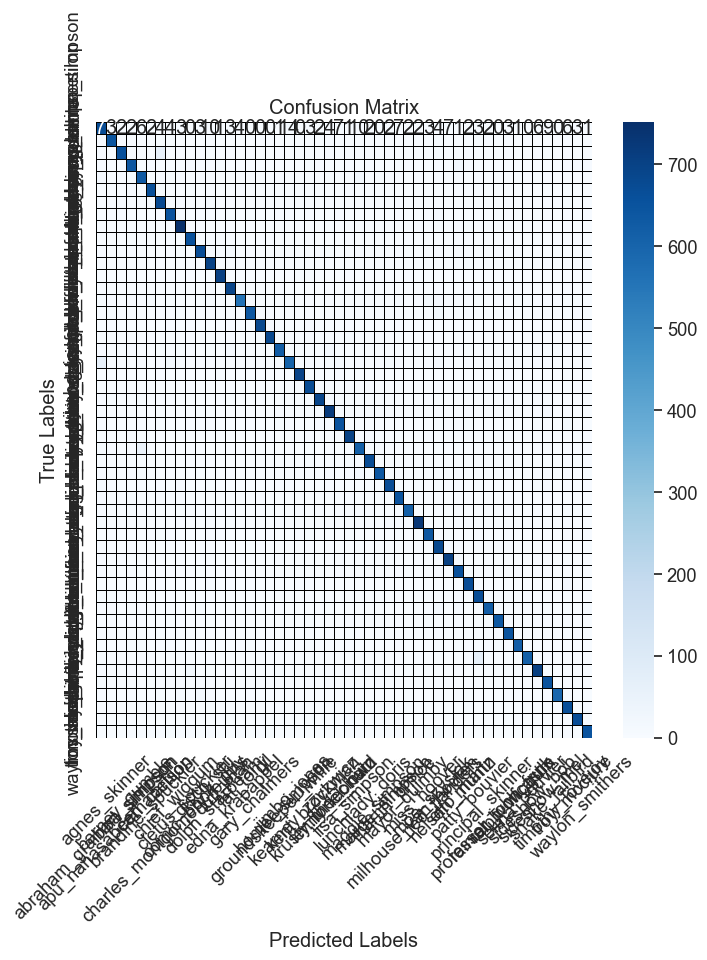

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(8, 8))
    sns.set(font_scale=1.2)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5, linecolor='black')
    plt.xticks(ticks=range(len(class_names)), labels=class_names, rotation=45)
    plt.yticks(ticks=range(len(class_names)), labels=class_names)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()

# class_names 為類別標籤，可以使用 label_encoder.classes_ 獲得
class_names = label_encoder.classes_

plot_confusion_matrix(confusion_matrix_result, class_names)


### To remove background

In [ ]:
# import os
# import cv2
# from cvzone.SelfiSegmentationModule import SelfiSegmentation

# # Initialize the SelfiSegmentation instance
# segmentor = SelfiSegmentation()

# # Input and output directories
# input_dir = "data/machine-learning-2023nycu-classification/train/train"  # Replace with your input directory path
# output_dir = "train_out_nobg"  # Replace with your output directory path

# # Iterate through each folder in the input directory
# for folder_name in os.listdir(input_dir):
#     folder_path = os.path.join(input_dir, folder_name)

#     # Check if the item in the directory is a folder
#     if os.path.isdir(folder_path):
#         # Create an output folder for the current subdirectory
#         output_folder_path = os.path.join(output_dir, folder_name)
#         os.makedirs(output_folder_path, exist_ok=True)

#         # Iterate through each image in the folder
#         for image_name in os.listdir(folder_path):
#             image_path = os.path.join(folder_path, image_name)

#             # Read the image
#             img = cv2.imread(image_path)

#             # Apply background removal
#             img_out = segmentor.removeBG(img, (255, 255, 255))

#             # Save the processed image to the output folder
#             output_image_path = os.path.join(output_folder_path, image_name)
#             cv2.imwrite(output_image_path, img_out)

# print("Background removal completed.")